In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Input, GlobalMaxPool2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train , x_test = x_train/255.0, x_test/255.0
y_train , y_test = y_train.flatten(),y_test.flatten()

print('x_train.shape ',x_train.shape)

170508288/170498071 [==============================] - 4s 0us/step
x_train.shape  (50000, 32, 32, 3)


In [ ]:
k = len(set(y_train))
print('no. of classes ',k)

no. of classes  10


In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(i)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i,x)



In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3505 - accuracy: 0.5275 - val_loss: 1.4703 - val_accuracy: 0.5133
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8920 - accuracy: 0.6883 - val_loss: 1.0257 - val_accuracy: 0.6594
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7338 - accuracy: 0.7457 - val_loss: 0.7974 - val_accuracy: 0.7243
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6322 - accuracy: 0.7832 - val_loss: 0.7435 - val_accuracy: 0.7435
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5368 - accuracy: 0.8155 - val_loss: 0.7081 - val_accuracy: 0.7704
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4665 - accuracy: 0.8384 - val_loss: 0.6859 - val_accuracy: 0.7784
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.3958 - accuracy: 0.8615 - val_loss: 0.7867 - val_ac

In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data = (x_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 50)

Epoch 1/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4717 - accuracy: 0.8456 - val_loss: 0.4884 - val_accuracy: 0.8441
Epoch 2/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.4368 - accuracy: 0.8560 - val_loss: 0.5398 - val_accuracy: 0.8241
Epoch 3/50
1562/1562 [==============================] - 29s 18ms/step - loss: 0.4143 - accuracy: 0.8613 - val_loss: 0.5105 - val_accuracy: 0.8391
Epoch 4/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3992 - accuracy: 0.8653 - val_loss: 0.4925 - val_accuracy: 0.8438
Epoch 5/50
1562/1562 [==============================] - 29s 19ms/step - loss: 0.3791 - accuracy: 0.8743 - val_loss: 0.5014 - val_accuracy: 0.8409
Epoch 6/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3683 - accuracy: 0.8763 - val_loss: 0.4871 - val_accuracy: 0.8449
Epoch 7/50
1562/1562 [==============================] - 30s 19ms/step - loss: 0.3533 - accuracy: 0.8804 - val_loss: 0.4651 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4754 - accuracy: 0.8743


[0.4754253923892975, 0.8743000030517578]

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        1849

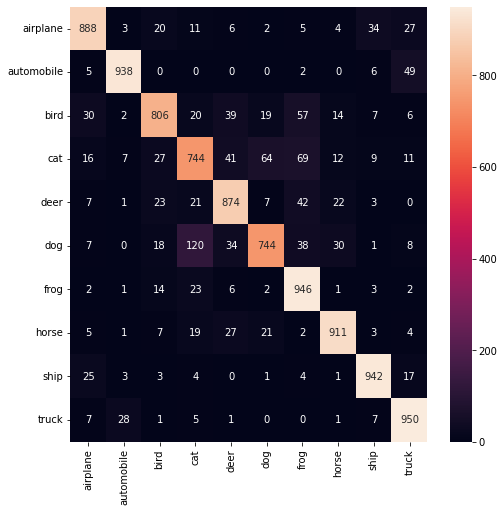

In [ ]:
predictions  = model.predict(x_test)

#The following 7 lines are all that is required to plot the confusion matrix.
predictions_for_cm = predictions.argmax(1)

from sklearn.metrics import confusion_matrix
import seaborn as sns
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

cm = confusion_matrix(y_test,predictions_for_cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True,  xticklabels=class_names, yticklabels = class_names, fmt='g')